In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])


0 [-2  4 -1]
1 [ 4  1 -1]
2 [ 1  6 -1]
3 [ 2  4 -1]
4 [ 6  2 -1]


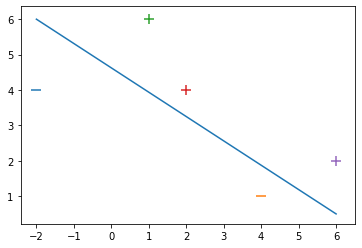

In [3]:
#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    print(d,sample)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.plot([-2,6],[6,0.5])

In [4]:
def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

/home/mo5/Desktop/desktop/python/jupyter1.0/jupyter1.0_env/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


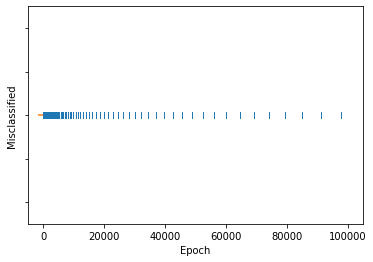

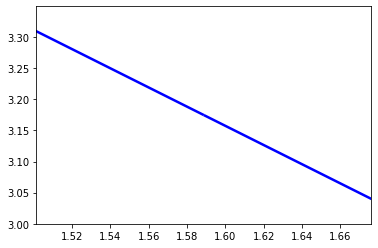

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

w = svm_sgd_plot(X,y)
# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')
